In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'D:/houses_to_rent.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
all_cols = df.columns
all_cols


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [27]:
df.describe()

,area,rooms,bathroom,parking_spaces,hoa,rent_amount,property_tax,fire_insurance,total
count,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000
mean,149.005899,2.505665,2.234947,1.608203,913.969098,3885.466336,330.470269,53.146081,5183.240659
std,537.228178,1.170412,1.405496,1.588222,1117.138270,3368.116071,585.316243,47.137747,4430.246452
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.000000,1.000000,0.000000,170.000000,1529.500000,38.000000,21.000000,2060.000000
50%,90.000000,2.000000,2.000000,1.000000,560.000000,2650.000000,125.000000,36.000000,3575.000000
75%,182.000000,3.000000,3.000000,2.000000,1231.500000,5000.000000,375.000000,68.000000,6750.000000
max,46335.000000,13.000000,10.000000,12.000000,14130.000000,25000.000000,12500.000000,376.000000,28790.000000


In [11]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
df.columns = cols

In [10]:
df.rename(columns={'hoa_(R$)' : 'hoa',
'rent_amount_(R$)' : 'rent_amount',
'property_tax_(R$)' : 'property_tax',
'fire_insurance_(R$)' : 'fire_insurance',
'total_(R$)' : 'total'}, inplace = True)
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

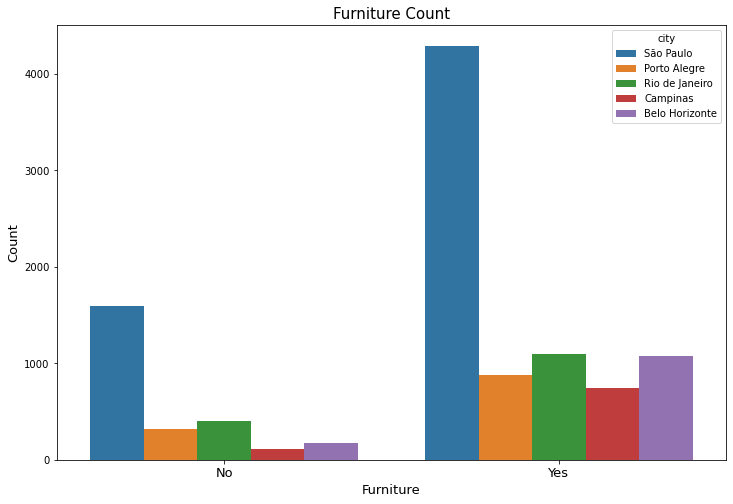

In [12]:
fc = sns.countplot(df['furniture'], hue = df['city'])
fc.figure.set_size_inches(12, 8)
fc.set_title('Furniture Count',fontsize=15)
fc.set_xlabel('Furniture',fontsize=13)
fc.set_ylabel('Count', fontsize=13)
fc.set_xticklabels(['No','Yes'], fontsize=13)

Text(0, 0.5, 'Area Size')

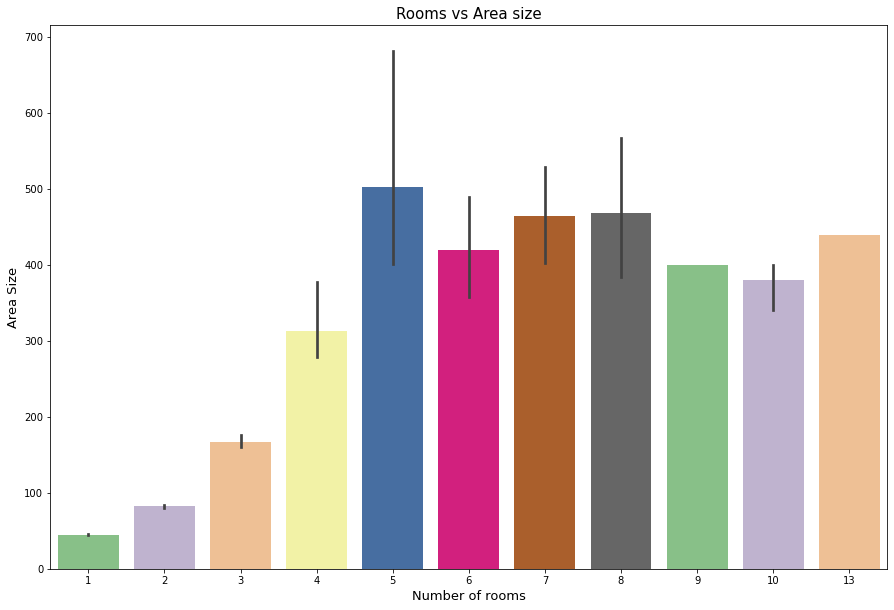

In [26]:
bs = sns.barplot(x='rooms', y='area', data = df, palette = 'Accent')
bs.figure.set_size_inches(15, 10)
bs.set_title('Rooms vs Area size',fontsize=15)
bs.set_xlabel('Number of rooms', fontsize=13)
bs.set_ylabel('Area Size', fontsize=13)

Text(0, 0.5, 'HOA Tax (R$)')

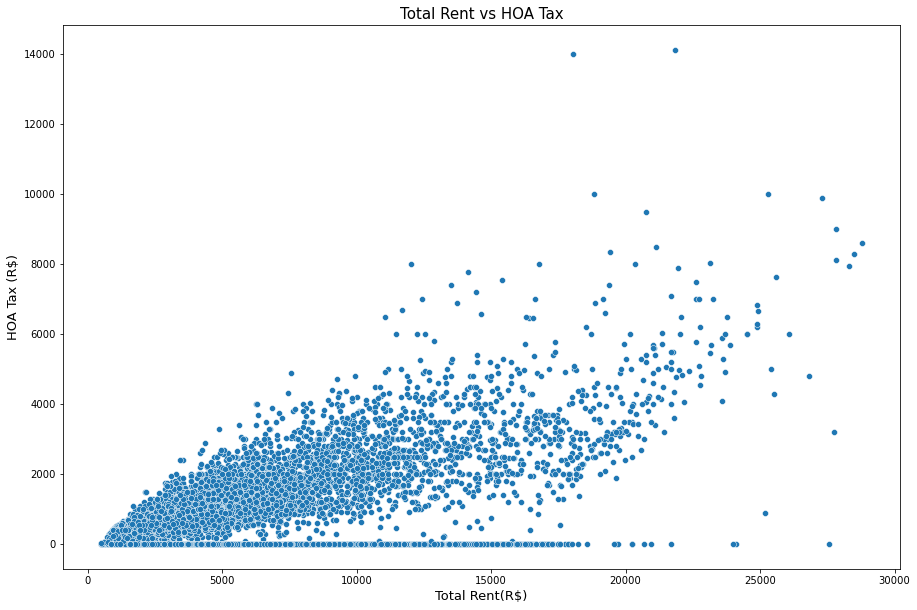

In [14]:
df = df.drop(labels=df[(df['hoa'] > 300000)].index)
df = df.drop(labels=df[(df['total'] > 30000)].index)
th = sns.scatterplot(x = 'total', y = 'hoa', data = df)
th.figure.set_size_inches(15, 10)
th.set_title('Total Rent vs HOA Tax',fontsize=15)
th.set_xlabel('Total Rent(R$)', fontsize=13)
th.set_ylabel('HOA Tax (R$)', fontsize=13)

<AxesSubplot:>

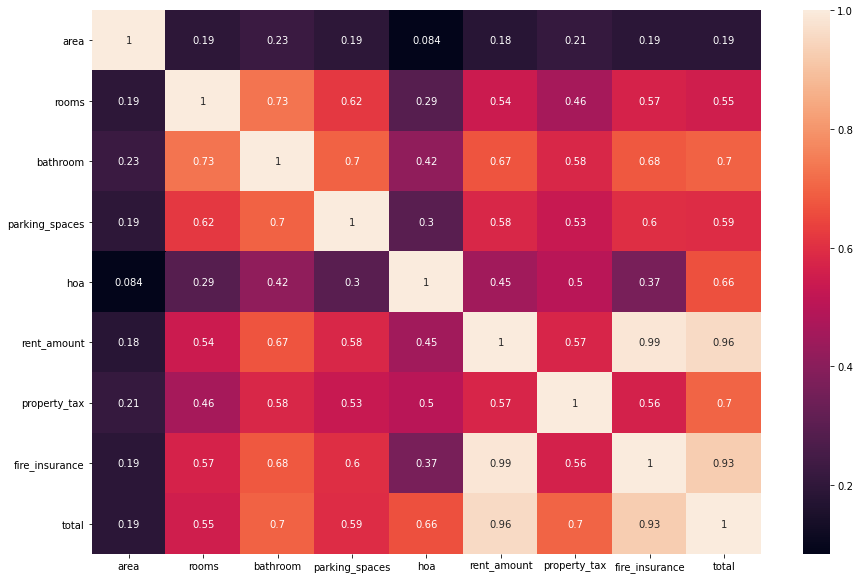

In [24]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [16]:
req_cols = cor[cor.loc['rent_amount']>0.5].T.columns
req_cols

Index(['rooms', 'bathroom', 'parking_spaces', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

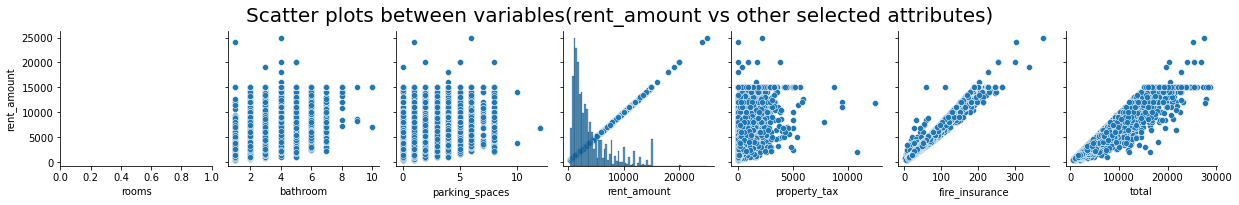

In [17]:
ax = sns.pairplot(df, y_vars='rent_amount', x_vars=req_cols)
ax.fig.suptitle('Scatter plots between variables(rent_amount vs other selected attributes)', fontsize=20, y=1.1)
ax


In [18]:
metrics = []
y = df['rent_amount']
x = df[req_cols]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test)

In [22]:
import statsmodels.api as sm
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
#looking the metrics
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.810e+33
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:30:43   Log-Likelihood:             1.9159e+05
No. Observations:                7475   AIC:                        -3.832e+05
Df Residuals:                    7467   BIC:                        -3.831e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.405e-13   5.18e-14     -8.